In [1]:
pip install --upgrade --force-reinstall tensorflow


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 507,


     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.5 kB ? eta -:--:--
     -------------------------------------- 57.5/57.5 kB 605.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ------------------------------------- -- 61.4/65.5 kB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 3.2 MB/s eta 0:00:01
     --- ------------------------------------ 0.1/1.5 MB 1.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
     --

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
import os
from PIL import Image

# Directory paths
dataset_path = "D:/Code/impressionists/training/paintings"
output_dir = "D:/Code/impressionists/training/resized_images"

# Define the image dimensions
target_size = (256, 256)  # Set the desired size

# Function to resize images in a folder and save to output directory
def resize_and_save_images(folder_path, output_path):
    # Get the painter's folder name
    folder_name = os.path.basename(folder_path)
    
    # Create a folder in the output directory with the same name
    output_folder = os.path.join(output_path, folder_name)
    os.makedirs(output_folder, exist_ok=True)

    # Loop through images in the folder and resize
    for file in os.listdir(folder_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(folder_path, file)
            image = Image.open(image_path)
            image = image.resize(target_size)
            
            # Save the resized image to the output folder
            save_path = os.path.join(output_folder, file)
            image.save(save_path)

# Loop through each painter's folder to resize images and save
painters = ['davinci', 'frida_kahlo', 'henri_matisse', 'jackson_pollock', 'johannes_vermeer', 'picasso', 'pierre_auguste', 'raphael', 'rembrandt', 'van_gogh']
for painter_folder in painters:
    folder_path = os.path.join(dataset_path, painter_folder)
    resize_and_save_images(folder_path, output_dir)

# Images should now be resized and saved within their corresponding painter's directories in the 'resized_images' folder.


 

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50 

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "resized_images", 
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    

Found 606 files belonging to 10 classes.


In [9]:
class_names = dataset.class_names
class_names

['davinci',
 'frida_kahlo',
 'henri_matisse',
 'jackson_pollock',
 'johannes_vermeer',
 'picasso',
 'pierre_auguste',
 'raphael',
 'rembrandt',
 'van_gogh']

In [10]:
len(dataset)

19

In [11]:
19*32

608

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[8 8 4 8 8 8 6 5 5 8 6 1 2 0 9 5 9 9 3 0 9 5 9 5 7 1 9 5 2 6 5 5]


In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[185.  89.  51.]
  [175.  85.  50.]
  [151.  75.  41.]
  ...
  [202. 165. 149.]
  [201. 161. 149.]
  [195. 155. 145.]]

 [[181.  85.  47.]
  [172.  82.  47.]
  [147.  71.  37.]
  ...
  [204. 167. 149.]
  [203. 164. 149.]
  [196. 157. 142.]]

 [[181.  85.  47.]
  [172.  82.  47.]
  [146.  70.  38.]
  ...
  [203. 167. 143.]
  [202. 164. 143.]
  [195. 157. 136.]]

 ...

 [[179. 173. 151.]
  [161. 155. 133.]
  [151. 146. 124.]
  ...
  [162. 104. 100.]
  [171. 113. 109.]
  [165. 107. 103.]]

 [[174. 168. 146.]
  [160. 154. 132.]
  [156. 151. 129.]
  ...
  [169. 111. 107.]
  [177. 119. 115.]
  [171. 113. 109.]]

 [[171. 165. 143.]
  [160. 154. 132.]
  [160. 155. 133.]
  ...
  [166. 108. 104.]
  [173. 115. 111.]
  [167. 109. 105.]]]


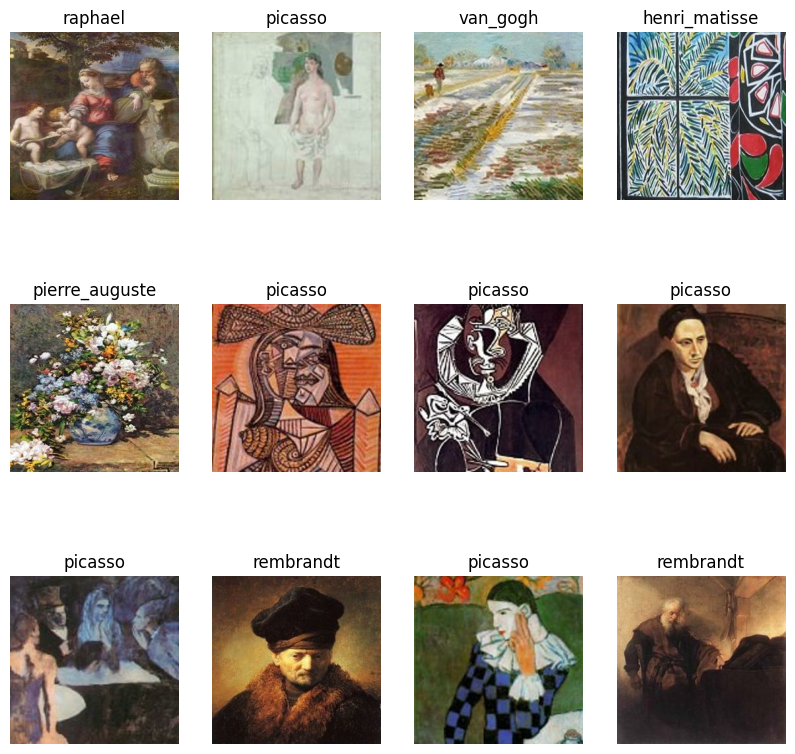

In [14]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [15]:
#80% ==> training
#20% ==> 10% validation, 10% test

In [16]:
train_size = 0.8
len(dataset)*train_size

15.200000000000001

In [17]:
train_ds = dataset.take(15)
len(train_ds)

15

In [18]:
test_ds = dataset.skip(15)
len(test_ds)

4

In [19]:
val_size = 0.1
len(dataset)*val_size

1.9000000000000001

In [20]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [21]:
test_ds = test_ds.skip(1)
len(test_ds)

3

In [22]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

15

In [25]:
len(test_ds)

3

In [26]:
len(val_ds)

1

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [30]:
from tensorflow.keras import regularizers
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [32]:
import numpy as np

In [35]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
train_labels = np.concatenate([label.numpy() for _, label in train_ds])
unique_classes = np.unique(train_labels)
class_weights = compute_class_weight("balanced", classes=unique_classes, y=train_labels)
class_weights_dict = dict(zip(unique_classes, class_weights))


# Compile the model with class weights and use the custom F1 score metric
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

# Train the model while passing class weights
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
    class_weight=class_weights_dict  # Pass class weights during training
)




Epoch 1/50


15/15 [==============================] - 15s 764ms/step - loss: 2.3126 - accuracy: 0.0229 - val_loss: 2.3062 - val_accuracy: 0.0312
Epoch 2/50
15/15 [==============================] - 10s 653ms/step - loss: 2.2897 - accuracy: 0.0312 - val_loss: 2.3061 - val_accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 9s 578ms/step - loss: 2.2375 - accuracy: 0.0792 - val_loss: 2.1732 - val_accuracy: 0.2188
Epoch 4/50
15/15 [==============================] - 9s 582ms/step - loss: 2.1381 - accuracy: 0.1625 - val_loss: 2.0438 - val_accuracy: 0.3750
Epoch 5/50
15/15 [==============================] - 9s 604ms/step - loss: 2.0300 - accuracy: 0.1521 - val_loss: 1.9367 - val_accuracy: 0.2188
Epoch 6/50
15/15 [==============================] - 9s 607ms/step - loss: 2.0205 - accuracy: 0.2375 - val_loss: 1.9735 - val_accuracy: 0.2500
Epoch 7/50
15/15 [==============================] - 9s 616ms/step - loss: 1.9109 - accuracy: 0.1729 - val_loss: 1.9856 - val_accuracy: 0.37

KeyboardInterrupt: 

In [36]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 215ms/step - loss: 1.8298 - accuracy: 0.2604


In [37]:
scores

[1.829785704612732, 0.2604166567325592]

In [41]:
history

pip install --upgrade --force-reinstall tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory paths
dataset_path = "D:/Code/impressionists/training/paintings"
output_dir = "D:/Code/impressionists/training/resized_images"

# Define the image dimensions
target_size = (256, 256)  # Set the desired size

# Function to resize images in a folder and save to output directory
def resize_and_save_images(folder_path, output_path):
    # Get the painter's folder name
    folder_name = os.path.basename(folder_path)
    
    # Create a folder in the output directory with the same name
    output_folder = os.path.join(output_path, folder_name)
    os.makedirs(output_folder, exist_ok=True)

    # Loop th

In [43]:
%history

pip install --upgrade --force-reinstall tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory paths
dataset_path = "D:/Code/impressionists/training/paintings"
output_dir = "D:/Code/impressionists/training/resized_images"

# Define the image dimensions
target_size = (256, 256)  # Set the desired size

# Function to resize images in a folder and save to output directory
def resize_and_save_images(folder_path, output_path):
    # Get the painter's folder name
    folder_name = os.path.basename(folder_path)
    
    # Create a folder in the output directory with the same name
    output_folder = os.path.join(output_path, folder_name)
    os.makedirs(output_folder, exist_ok=True)

    # Loop th

In [45]:
history_manager = get_ipython().history_manager

# Access the params attribute
params = history_manager.params

AttributeError: 'HistoryManager' object has no attribute 'params'

In [44]:
history.params

NameError: name 'history' is not defined

In [40]:
history.history.keys()

NameError: name 'history' is not defined

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


NameError: name 'history' is not defined

NameError: name 'acc' is not defined

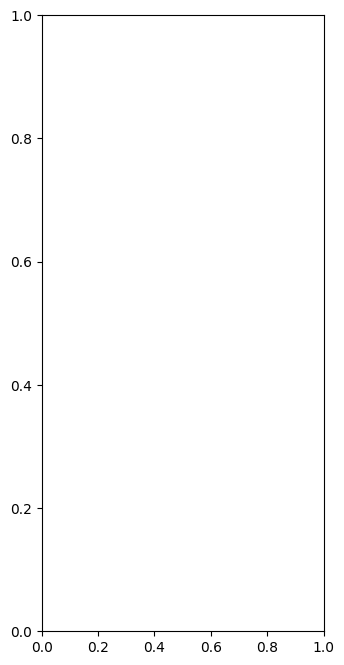

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


First image to print
actual label: rembrandt
1/1 [==============================] - 0s 402ms/step
predicted label davinci


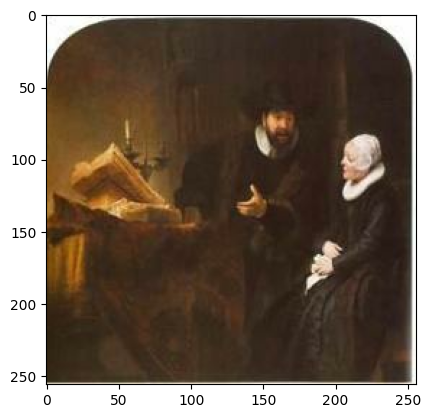

In [48]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to print")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label", class_names[np.argmax(batch_prediction[0])])
    

In [49]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 35ms/step


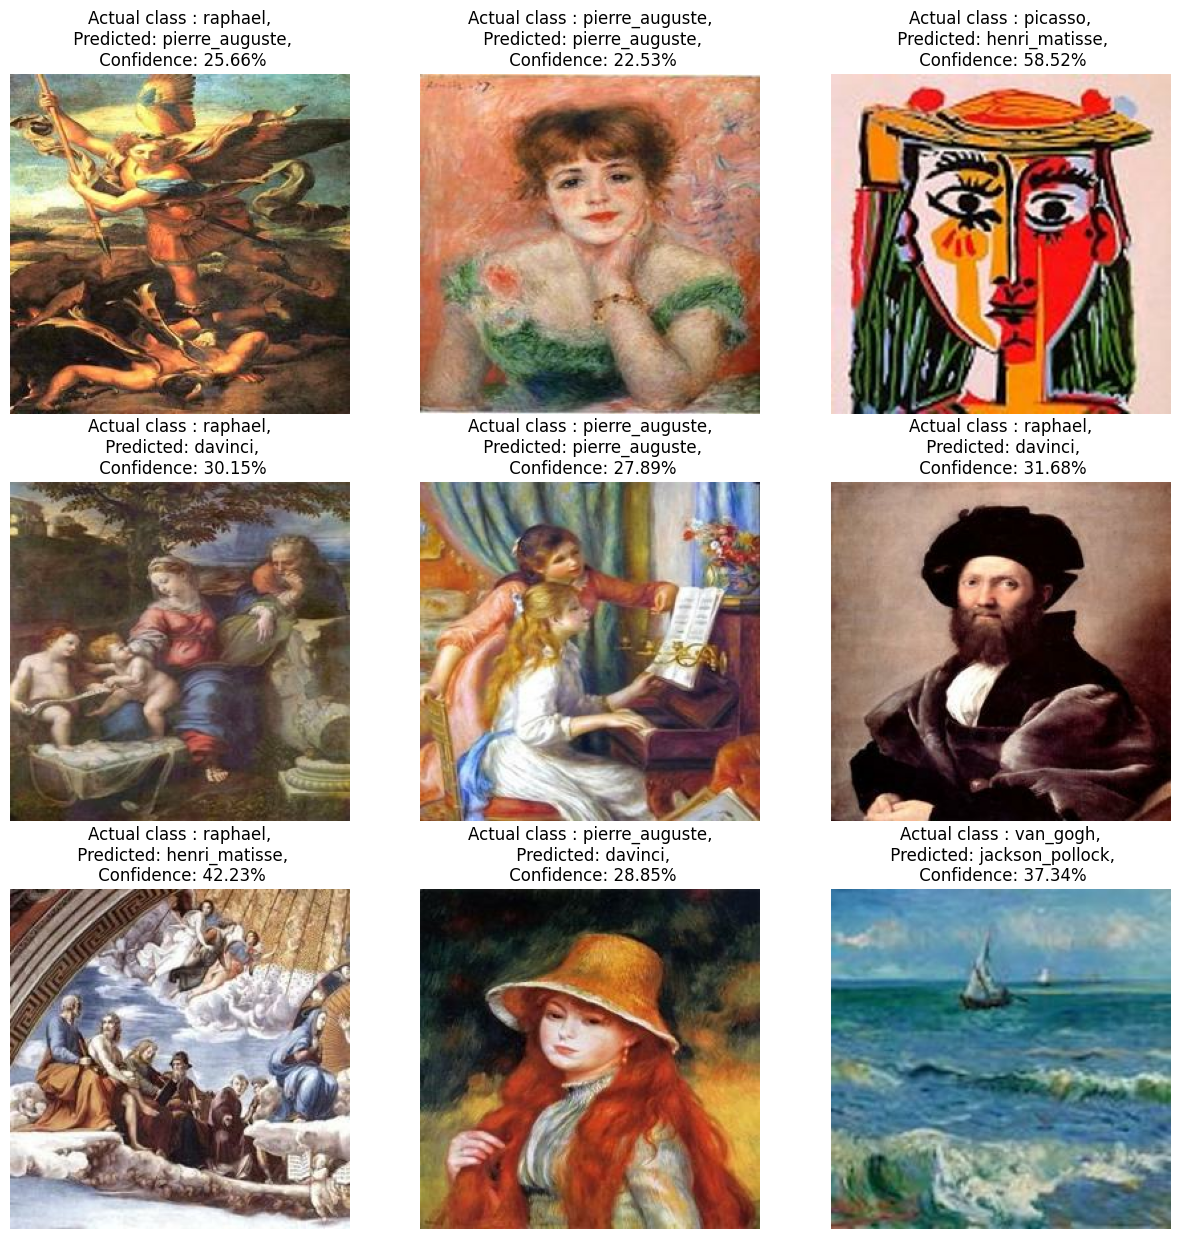

In [50]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual class : {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%" )
        plt.axis("off")
        


In [51]:
import os
os.listdir("../models")

['1', '2']

In [ ]:
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")